In [107]:
import matplotlib.pyplot as plt


def print_graph(predicted, x_train, y_train):


    predictions = []
    for prediction in predicted:
            predictions.append(prediction.argmax())

    labels = []
    for y in y_train:
            labels.append(y.argmax())

    column_a = []
    for x in x_train:
        column_a.append(x[0])

    plt.plot(column_a, labels, 'go', label='True data', alpha=0.5)
    plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.3)
    plt.legend(loc='best')
    plt.show()

### Set up dataset

In [108]:
import torch
from sail_safe_functions.machine_learning.models.LogisticRegression import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

iris = load_iris()

encoder = OneHotEncoder(sparse=False)
x_train = iris.data
y_train =encoder.fit_transform(iris.target.reshape(-1, 1))
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = x_train.float()
y_train = y_train.float()

#TODO: Properly Federate Data
data_federation = [[x_train, y_train], [x_train, y_train]]

in_layer = len(x_train[0])
out_layer = len(y_train[0])
optimizer = "SGD"
criterion = "MSELoss"
starting_model = LogisticRegression(in_layer, out_layer)
epochs = 400
learn_rate = 0.1

### Starting Model Predictions

/tmp/ipykernel_6325/1031522860.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.3)


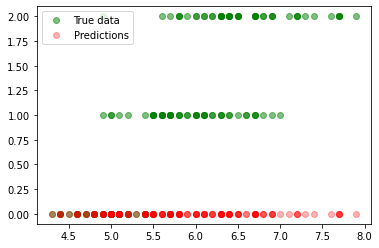

In [109]:
predicted = starting_model(x_train)

print_graph(predicted, x_train, y_train)

### Single Trained Model Predictions

/tmp/ipykernel_6325/1031522860.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.3)


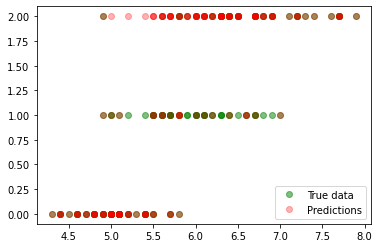

In [110]:
from sail_safe_functions.machine_learning.utilities.ModelTrain import ModelTrain
from sail_safe_functions.machine_learning.utilities.ModelUtility import ModelUtility

#Train a single model on a single SCN
trained_model= ModelTrain.run(epochs, data_federation[0], learn_rate, starting_model, criterion, optimizer)
predicted = trained_model(x_train)

print_graph(predicted, x_train, y_train)


### Averaged Model Predictions

In [111]:
from sail_safe_functions.machine_learning.utilities.ModelAverage import ModelAverage

trained_models = []
avg_model = trained_model

# Train a model with every member of our data federation
for j in range(len(data_federation)):
    trained_models.append(ModelTrain.run(epochs, data_federation[j], learn_rate, avg_model, criterion, optimizer))
avg_model = ModelAverage.run(trained_models)

avg_model

LogisticRegression(
  (model): Linear(in_features=4, out_features=3, bias=False)
)

### Retrieving Model from Parameters

In [112]:
from sail_safe_functions.machine_learning.utilities.ModelRetrieve import ModelRetrieve

#Retrieve Averaged Model
avg_model = ModelRetrieve.run(avg_model)

predicted = avg_model(x_train)

/tmp/ipykernel_6325/1031522860.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.3)


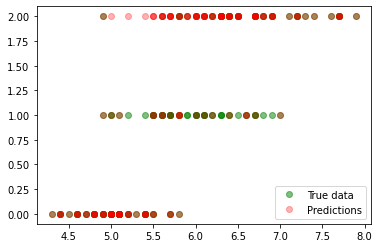

In [113]:
print_graph(predicted, x_train, y_train)